In [1]:
"""
- Data Exploration, Cleaning
- Distribution of amplitudes across the 3 classes
- Distibution of constituent frequencies across the 3 classes
- Split the data into trian and validation sets and package it together into a single file
"""

'\n- Data Exploration, Cleaning\n- Distribution of amplitudes across the 3 classes\n- Distibution of constituent frequencies across the 3 classes\n- Split the data into trian and validation sets and package it together into a single file\n'

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
classes = {
        "high_activity": 0,
        "moderate_activity": 1,
        "no_activity": 2}

In [4]:
# Load data
data_paths = []
labels = []
for path in os.listdir('./Data/'):
    for activity in os.listdir(f"./Data/{path}/"):
        for item in os.listdir(f"./Data/{path}/{activity}/"):
            data_paths.append(f"./Data/{path}/{activity}/{item}")
            labels.append(classes[activity])
   
print(data_paths)

# Although times column is present in the data, we can ignore it.
data = pd.DataFrame()
for path, label in zip(data_paths, labels):
    data_df = pd.DataFrame()

    # The operations below could be simplified..
    data_item = np.asarray(pd.read_csv(path, usecols=[1,])).reshape(1,-1)[0]
    # add entire data_item array as a single row
    data_df = pd.DataFrame(data_item).T
    data_df['label'] = label  # Add the label to the data_item DataFrame
    data = pd.concat([data, data_df], axis=0)
    

['./Data/daniel/high_activity/0.csv', './Data/daniel/high_activity/1.csv', './Data/daniel/high_activity/10.csv', './Data/daniel/high_activity/11.csv', './Data/daniel/high_activity/12.csv', './Data/daniel/high_activity/13.csv', './Data/daniel/high_activity/14.csv', './Data/daniel/high_activity/15.csv', './Data/daniel/high_activity/16.csv', './Data/daniel/high_activity/17.csv', './Data/daniel/high_activity/18.csv', './Data/daniel/high_activity/19.csv', './Data/daniel/high_activity/2.csv', './Data/daniel/high_activity/20.csv', './Data/daniel/high_activity/21.csv', './Data/daniel/high_activity/22.csv', './Data/daniel/high_activity/23.csv', './Data/daniel/high_activity/24.csv', './Data/daniel/high_activity/25.csv', './Data/daniel/high_activity/26.csv', './Data/daniel/high_activity/27.csv', './Data/daniel/high_activity/28.csv', './Data/daniel/high_activity/29.csv', './Data/daniel/high_activity/3.csv', './Data/daniel/high_activity/30.csv', './Data/daniel/high_activity/31.csv', './Data/daniel/

In [5]:
data.head()
# 650 timestpes represent a single second

,0,1,2,3,4,5,6,7,8,9,...,641,642,643,644,645,646,647,648,649,label
0,412,857,1246,1226,620,-30,-42,124,-17,-73,...,1020.0,225.0,-388.0,-328.0,-206.0,-313.0,-290.0,-466.0,-728.0,0
0,-442,-210,-317,-225,-348,-633,-313,-133,-704,-646,...,-221.0,-8.0,-2.0,30.0,100.0,-116.0,-247.0,-150.0,-141.0,0
0,605,165,-302,154,380,-25,429,1207,786,423,...,285.0,244.0,201.0,109.0,32.0,8.0,-19.0,-92.0,-210.0,0
0,-249,-90,-49,-270,-333,-229,-406,-507,-122,60,...,257.0,292.0,348.0,367.0,326.0,290.0,234.0,161.0,137.0,0
0,49,-111,-124,214,438,-94,-655,-113,756,229,...,-178.0,-158.0,-88.0,-21.0,17.0,58.0,90.0,116.0,131.0,0


In [6]:
# Clean the data
# For each label, count the number of rows where NaN/ Na values occur  
for i in range(3):
    print(f"Before Cleaning:\n\tNumber of NaN/Na values in class {i}: {data[data['label'] == i].isna().sum().sum()}")

# Replace illegal values with the mean value of the rest of that row
for i in range(3):
    data.loc[data['label'] == i] = data[data['label'] == i].apply(lambda x: x.fillna(x.mean()), axis=0) # Is axis 0 correct??
print("\n\n")
# Count after cleaning
for i in range(3):
    print(f"After Cleaning:\n\tNumber of NaN/Na values in class {i}: {data[data['label'] == i].isna().sum().sum()}")


Before Cleaning:
	Number of NaN/Na values in class 0: 100
Before Cleaning:
	Number of NaN/Na values in class 1: 20
Before Cleaning:
	Number of NaN/Na values in class 2: 0



After Cleaning:
	Number of NaN/Na values in class 0: 0
After Cleaning:
	Number of NaN/Na values in class 1: 0
After Cleaning:
	Number of NaN/Na values in class 2: 0


In [7]:
# Print Data Summary statistics

print(len(data))
print(data['label'].value_counts())
print("\n")

for i in range(3):
    stat_data = data[data['label'] == i].drop('label', axis=1)
    stat_data_flat = stat_data.values.flatten()
    print(stat_data_flat.shape)
    print(f"Class: {list(classes.keys())[i]}")
    print(f"Mean: {round(np.mean(stat_data_flat),2)}")
    print(f"Median: {np.median(stat_data_flat)}")
    print(f"Std: {round(np.std(stat_data_flat),2)}")
    print(f"Min: {np.min(stat_data_flat)}")
    print(f"Max: {np.max(stat_data_flat)}")
    print("\n")


552
label
2    192
0    180
1    180
Name: count, dtype: int64


(117000,)
Class: high_activity
Mean: -16.25
Median: -49.0
Std: 384.23
Min: -1859.0
Max: 2840.0


(117000,)
Class: moderate_activity
Mean: -19.74
Median: -45.0
Std: 325.91
Min: -1689.0
Max: 2157.0


(124800,)
Class: no_activity
Mean: -39.05
Median: -61.0
Std: 385.14
Min: -8399.0
Max: 16013.0




(117000,)
(117000,)
(124800,)


'\nWhat does this distribution tell us??\n1. For No activity, not a lot of constituent values occur and most of data is around 0\n\n'

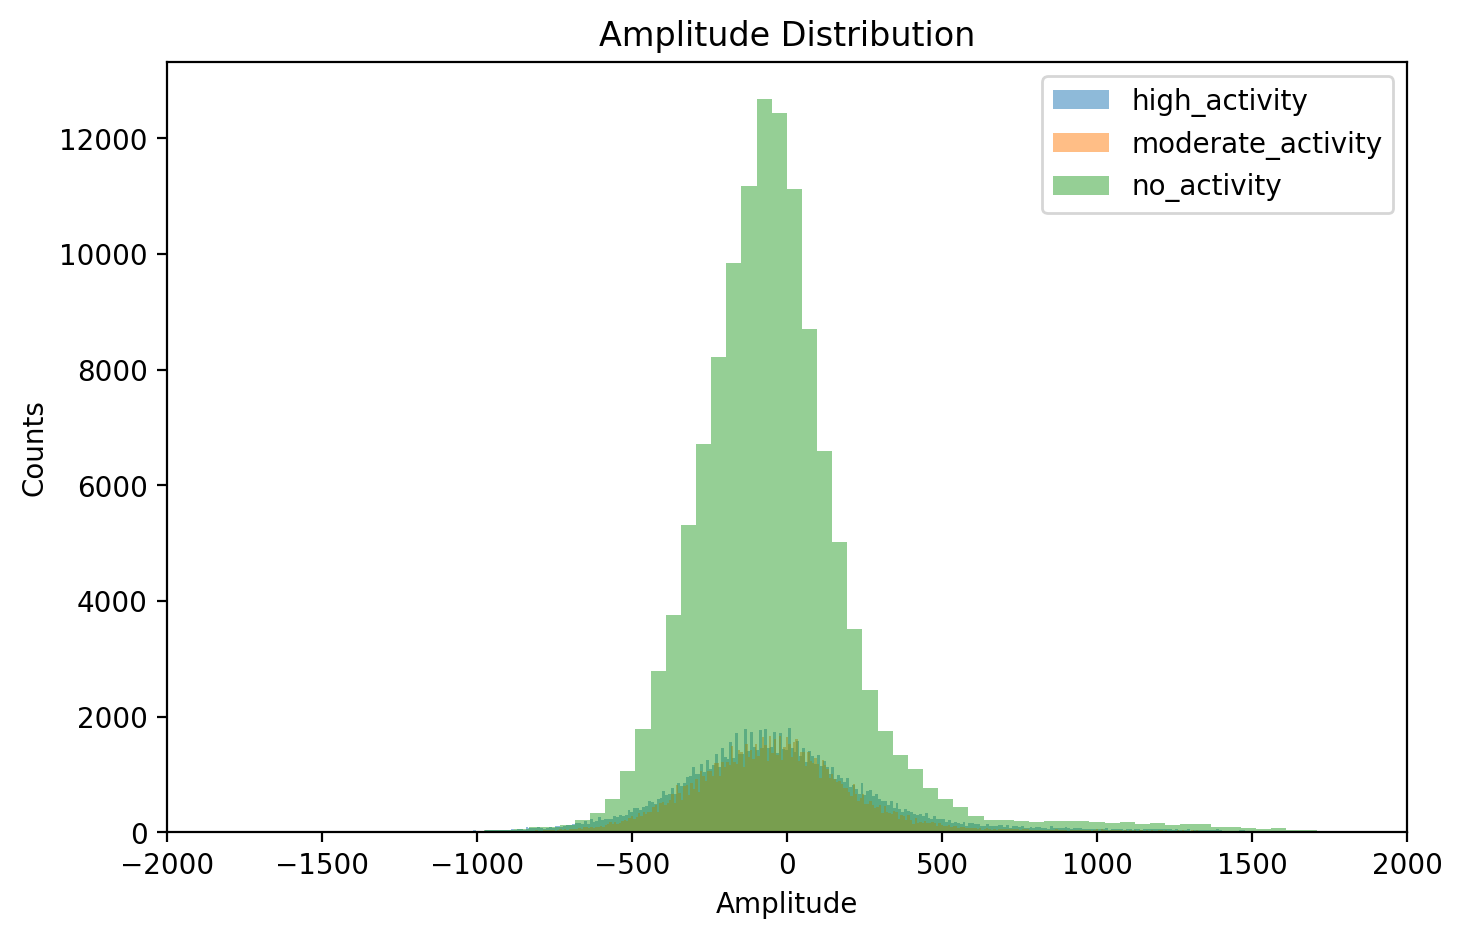

In [8]:
# Viz 1: Distribution of amplitudes across the 3 classes

fig, ax = plt.subplots(figsize=(8, 5), dpi = 200)
for i in range(3):
    
    plot_data = data[data['label'] == i].drop('label', axis=1) # 
    plot_data_flat = plot_data.values.flatten()

    print(plot_data_flat.shape)
    ax.hist(plot_data_flat, bins=500, alpha=0.5, label=list(classes.keys())[i])

ax.set_xlim(-2000, 2000)
ax.set_xlabel('Amplitude')
ax.set_ylabel('Counts')
ax.set_title('Amplitude Distribution')
ax.legend()
    
"""
What does this distribution tell us??
1. For No activity, not a lot of constituent values occur and most of data is around 0

"""

(117000,)
(117000,)
(124800,)


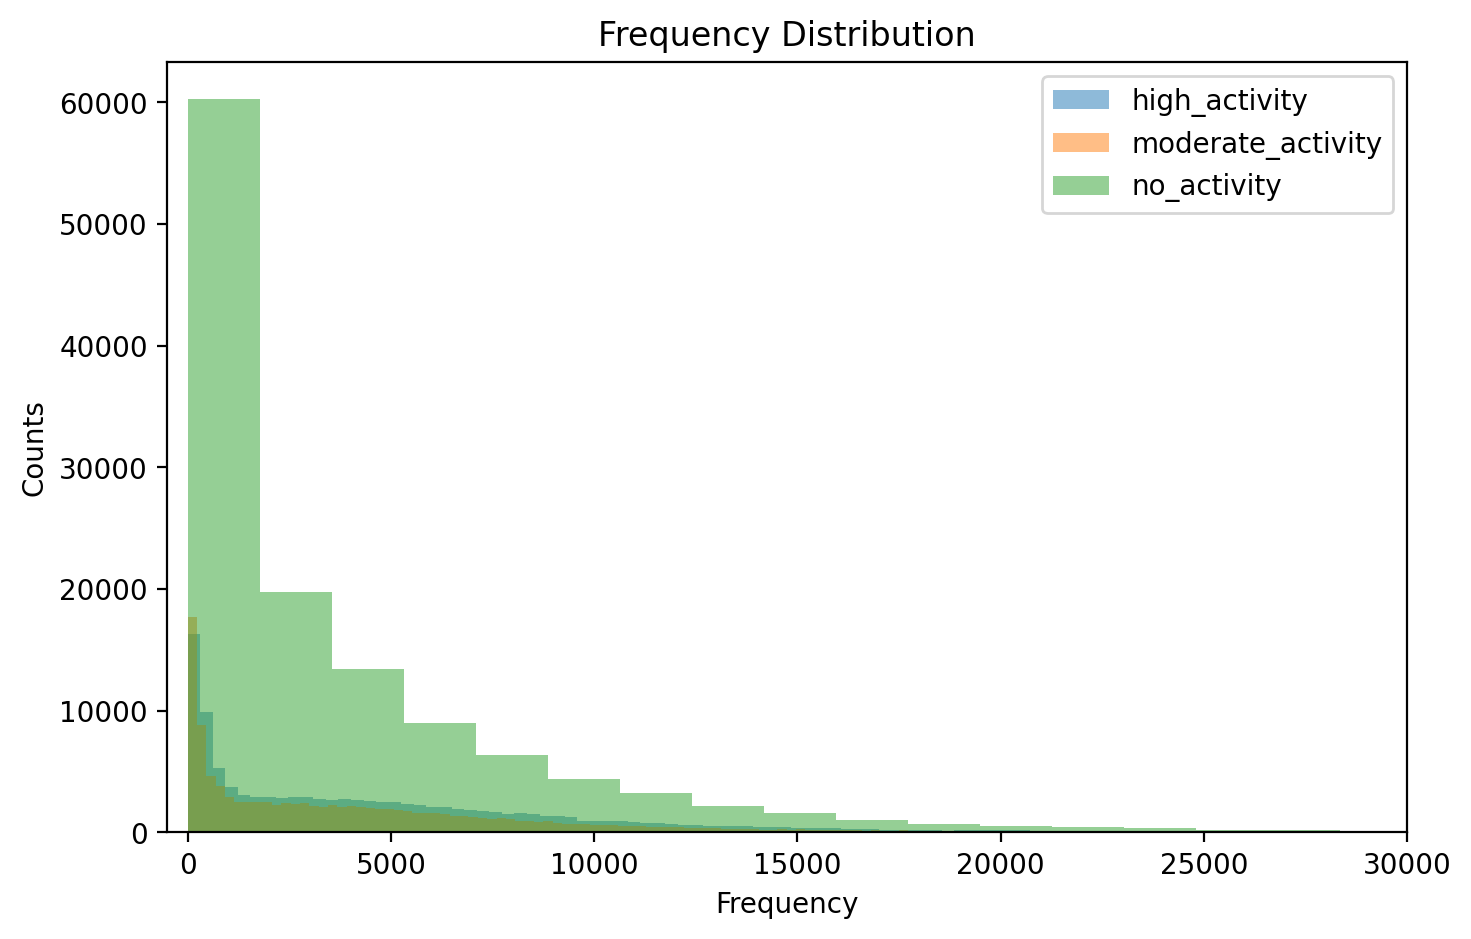

In [9]:
# Viz 2: Distibution of constituent frequencies across the 3 classes
# For each class, split each row into frequencies by applying FFT/ DFT and plot the distribution of the frequencies across classes 
fig, ax = plt.subplots(figsize=(8, 5), dpi = 200)
for i in range(3):
    
    plot_data = data[data['label'] == i].drop('label', axis=1) # 

    # Go through each row and apply FFT
    plot_data_fft_abs = []
    for row in plot_data.values:
        row_fft = np.abs(np.fft.fft(row))
        plot_data_fft_abs.extend(row_fft)
    plot_data_fft_abs = np.array(plot_data_fft_abs)
    print(plot_data_fft_abs.shape)
    ax.hist(plot_data_fft_abs, bins=500, alpha=0.5, label=list(classes.keys())[i])

ax.set_xlim(-500, 30000)
ax.set_xlabel('Frequency')
ax.set_ylabel('Counts')
ax.set_title('Frequency Distribution')
ax.legend()
    

In [10]:
# Perform a stratified split of the data into train and validation sets
X = data.drop('label', axis=1)
y = data['label']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

data_train = pd.concat([X_train, y_train], axis=1)
data_val = pd.concat([X_val, y_val], axis=1)

data_train.to_csv('./data_train.csv', index=False)
data_val.to_csv('./data_val.csv', index=False)